## Exploratory Data Analysis

In [253]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [254]:
#Read csv into a pandas dataframe.
csv = 'move_est.csv'
df = pd.read_csv(csv, index_col = 'order_id')
df.describe()

,fs,move_length_hours,executed_man_hours,booked_man_hours,order_total_spots,house,residence,rooms,coupon_amount,min_billable_man_hours,...,mkt_nashvilletn,mkt_phoenixaz,mkt_pittsburghpa,mkt_raleighdurhamchapelhillnc,mkt_saintlouismo,mkt_washingtondcdc,mt_atob,mt_gopher,mt_inhouselabor,mt_loading
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,...,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000
mean,0.510776,2.558733,6.204562,5.996121,2.203736,0.367960,0.917960,1.523563,35.174872,3.021552,...,0.093966,0.002443,0.046695,0.099569,0.035632,0.032615,0.083333,0.510776,0.122270,0.139080
std,0.499920,1.738273,5.017244,3.916913,0.531668,0.482285,0.274446,0.937487,102.845475,0.999840,...,0.291802,0.049365,0.211001,0.299446,0.185385,0.177639,0.276405,0.499920,0.327621,0.346055
min,0.000000,0.006944,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.274931,3.000000,4.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.236944,5.000000,6.000000,2.000000,0.000000,1.000000,1.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.416667,7.500000,8.000000,2.000000,1.000000,1.000000,2.000000,10.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,15.300000,79.750000,56.000000,7.000000,1.000000,1.000000,5.000000,3450.500000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


33 % of moves run over 3 hours.


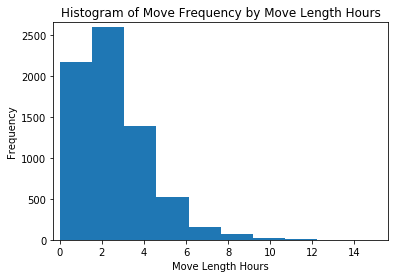

In [255]:
#Percent of moves over 3hr threshold
perc_over = round(np.mean(df.over)*100)
print(perc_over,"% of moves run over 3 hours.")

#Histogram of frequency of move lengths
plt.hist(df.move_length_hours)
plt.title('Histogram of Move Frequency by Move Length Hours')
plt.xlabel('Move Length Hours')
plt.ylabel('Frequency')
plt.margins(.02)
plt.show()

In [256]:
#Bellhops knows that full service moves tend to be longer than labor only moves, but by how much?
df['move_length_hours'].groupby(df['fs']).describe()

,count,mean,std,min,25%,50%,75%,max
fs,,,,,,,,
0,3405.0,1.638159,1.252532,0.006944,0.772222,1.333333,2.166667,14.583333
1,3555.0,3.440465,1.680562,0.236111,2.250000,3.111111,4.216667,15.300000


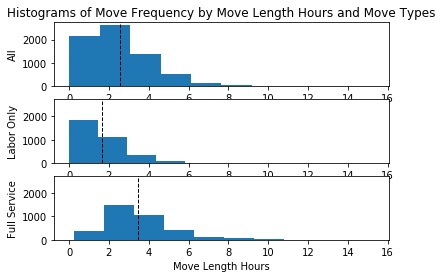

In [257]:
#What does move length distributions look like by move type?
ax1 = plt.subplot(3,1,1)
plt.hist(df.move_length_hours)
plt.axvline(df.move_length_hours.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histograms of Move Frequency by Move Length Hours and Move Types')
plt.ylabel('All')

plt.subplot(3,1,2,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.fs==0])
plt.axvline(df.move_length_hours[df.fs==0].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Labor Only')

plt.subplot(3,1,3,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.fs==1])
plt.axvline(df.move_length_hours[df.fs==1].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Full Service')
plt.xlabel('Move Length Hours')

plt.show()

In [258]:
#How much more likely are full service moves to go over the threshold than labor only moves?
df['over'].groupby(df['fs']).mean()

fs
0    0.117181
1    0.526301
Name: over, dtype: float64

In [259]:
df['executed_man_hours'].groupby(df['move_type']).mean()

move_type
atob            5.595690
gopher          8.348312
inhouselabor    2.873384
loading         4.290289
unloading       3.639911
Name: executed_man_hours, dtype: float64

In [260]:
df['over'].groupby(df['move_type']).mean()

move_type
atob            0.296552
gopher          0.526301
inhouselabor    0.032902
loading         0.130165
unloading       0.072565
Name: over, dtype: float64

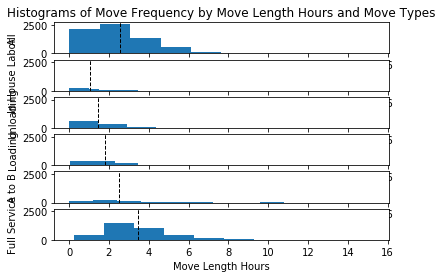

In [261]:
#What does move length distributions look like by move type?
ax1 = plt.subplot(6,1,1)
plt.hist(df.move_length_hours)
plt.axvline(df.move_length_hours.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histograms of Move Frequency by Move Length Hours and Move Types')
plt.ylabel('All')

plt.subplot(6,1,2,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.move_type=='inhouselabor'])
plt.axvline(df.move_length_hours[df.move_type=='inhouselabor'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('In House Labor')

plt.subplot(6,1,3,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.move_type=='unloading'])
plt.axvline(df.move_length_hours[df.move_type=='unloading'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Unloading')

plt.subplot(6,1,4,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.move_type=='loading'])
plt.axvline(df.move_length_hours[df.move_type=='loading'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Loading')

plt.subplot(6,1,5,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.move_type=='atob'])
plt.axvline(df.move_length_hours[df.move_type=='atob'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('A to B')

plt.subplot(6,1,6,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.move_type=='gopher'])
plt.axvline(df.move_length_hours[df.move_type=='gopher'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Full Service')

plt.xlabel('Move Length Hours')

plt.show()

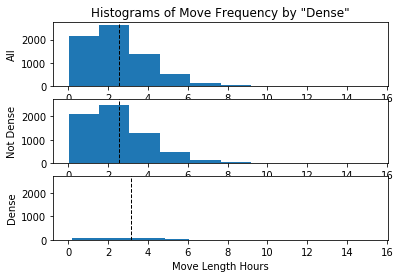

In [262]:
#Bellhops thinks that moves take longer in the most densely populated cities
ax1 = plt.subplot(3,1,1)
plt.hist(df.move_length_hours)
plt.axvline(df.move_length_hours.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histograms of Move Frequency by "Dense"')
plt.ylabel('All')

plt.subplot(3,1,2,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.dense==0])
plt.axvline(df.move_length_hours[df.dense==0].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Not Dense')

plt.subplot(3,1,3,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.dense==1])
plt.axvline(df.move_length_hours[df.dense==1].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Dense')

plt.xlabel('Move Length Hours')
plt.show()

There might be something there, but there are so few observations in the "dense" bucket.

In [263]:
#Bellhops has a hunch that there are persitent move length differences amoung markets. Here are mean move lengths by market and move type
ml = pd.crosstab(df.market, df.broad_move_type, values=df.move_length_hours, aggfunc=np.mean)

ml.sort_values('full_service',ascending=False)


broad_move_type,full_service,labor_only
market,,
washingtondcdc,4.316959,1.699580
pittsburghpa,3.926935,1.838543
saintlouismo,3.800980,1.800604
atlantaga,3.772254,1.806691
birminghamal,3.745658,1.760704
kansascitymo,3.557435,1.726419
denverco,3.461667,1.615118
houstontx,3.369601,1.583328
chicagoil,3.362394,1.784832


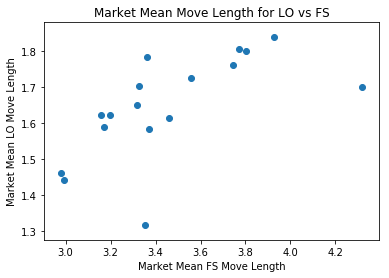

In [264]:
ml = ml[ml.labor_only<=4]
plt.scatter(ml.full_service,ml.labor_only)
plt.title('Market Mean Move Length for LO vs FS')
plt.xlabel('Market Mean FS Move Length')
plt.ylabel('Market Mean LO Move Length')
plt.show()

It is interesting to see that move lengths of different move types are correlated for markets. This seems to suggest there are market specific differences that aren't just due to markets having different distributions of move types.

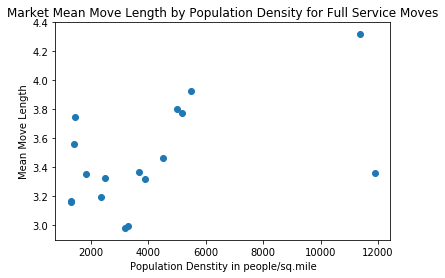

In [265]:
#Are these market specific differences driven by population density?
pop = pd.DataFrame(df['pop_density'].groupby(df['market']).mean())
ml_pop = ml.join(pop)

plt.scatter(ml_pop.pop_density,ml_pop.full_service)
plt.title('Market Mean Move Length by Population Density for Full Service Moves')
plt.xlabel('Population Denstity in people/sq.mile')
plt.ylabel('Mean Move Length')
plt.show()


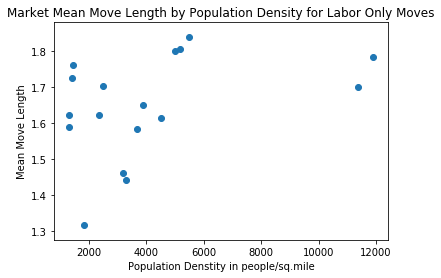

In [266]:
plt.scatter(ml_pop.pop_density,[ml_pop.labor_only])
plt.title('Market Mean Move Length by Population Density for Labor Only Moves')
plt.xlabel('Population Denstity in people/sq.mile')
plt.ylabel('Mean Move Length')
plt.show()


There isn't a plethora of observations, but the labor only scatter plot does suggest a positve correlation between mean move length and population density.

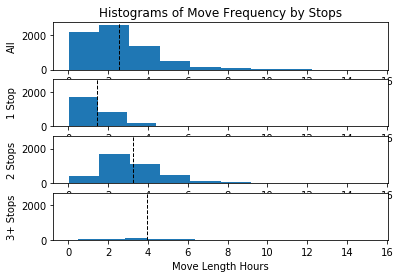

In [267]:
#We think that moves take longer the more stops there are
ax1 = plt.subplot(4,1,1)
plt.hist(df.move_length_hours)
plt.axvline(df.move_length_hours.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histograms of Move Frequency by Stops')
plt.ylabel('All')

plt.subplot(4,1,2,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.stops==1])
plt.axvline(df.move_length_hours[df.stops==1].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('1 Stop')

plt.subplot(4,1,3,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.stops==2])
plt.axvline(df.move_length_hours[df.stops==2].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('2 Stops')

plt.subplot(4,1,4,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.stops>=3])
plt.axvline(df.move_length_hours[df.stops>=3].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('3+ Stops')

plt.xlabel('Move Length Hours')
plt.show()

The top three histograms look very similar to the move type histograms. It is interesting to see this 3+ stop difference, although sample size for that group is small.

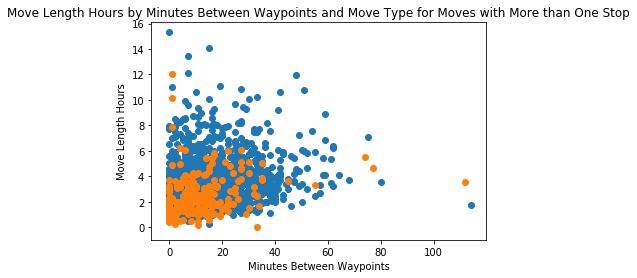

In [268]:
#You would think that drive time between waypoints would directly add to the move length
plt.scatter(df['minutes_between_waypoints'][(df['fs']==1) & (df['stops']>1)],df['move_length_hours'][(df['fs']==1) & (df['stops']>1)])
plt.scatter(df['minutes_between_waypoints'][(df['fs']==0) & (df['stops']>1)],df['move_length_hours'][(df['fs']==0) & (df['stops']>1)])
plt.title('Move Length Hours by Minutes Between Waypoints and Move Type for Moves with More than One Stop')
plt.ylabel('Move Length Hours')
plt.xlabel('Minutes Between Waypoints')
plt.show()

The relationship isn't extremely clear here. Variance/noise caused by other factor swamps the impact visually.

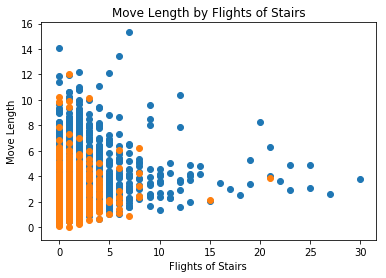

In [269]:
#Scatter for flights of stairs
plt.scatter(df['flights_of_stairs'][(df['fs']==1) & (df['stops']>1)],df['move_length_hours'][(df['fs']==1) & (df['stops']>1)])
plt.scatter(df['flights_of_stairs'][(df['fs']==0) & (df['stops']>1)],df['move_length_hours'][(df['fs']==0) & (df['stops']>1)])
plt.title('Move Length by Flights of Stairs')
plt.xlabel('Flights of Stairs')
plt.ylabel('Move Length')
plt.show()

In [270]:
#Is there a relationship between move length and whether or not the move occured in the morning?
df['move_length_hours'].groupby([df['fs'],df['morning']]).describe()

count      mean       std       min       25%       50%  \
fs morning                                                             
0  0        1587.0  1.392505  0.970185  0.006944  0.671111  1.160278   
   1        1818.0  1.852599  1.420836  0.016667  0.883333  1.568889   
1  0        1572.0  3.126374  1.416030  0.236111  2.118889  2.881389   
   1        1983.0  3.689457  1.826122  0.555000  2.400000  3.300000   

                 75%        max  
fs morning                       
0  0        1.921806   6.584167  
   1        2.416597  14.583333  
1  0        3.889028   9.983333  
   1        4.518056  15.300000

In [271]:
#Is there a relationship between move length and whether or not the move occured over the weekend?
df['move_length_hours'].groupby([df['fs'],df['weekend']]).describe()

count      mean       std       min       25%       50%  \
fs weekend                                                             
0  0        1548.0  1.618086  1.282820  0.016667  0.747917  1.307083   
   1        1857.0  1.654892  1.226808  0.006944  0.816667  1.359444   
1  0        1584.0  3.438731  1.783200  0.236111  2.183333  3.083333   
   1        1971.0  3.441858  1.593751  0.500000  2.301389  3.133333   

                 75%        max  
fs weekend                       
0  0        2.156458  12.074167  
   1        2.166667  14.583333  
1  0        4.251528  15.300000  
   1        4.183333  12.203889

In [272]:
#Add a column for correct booked man hours
#df['correct_booked_man_hours'] = np.ceil(df['executed_man_hours']/2)*2
df['even_base'] = np.where(np.floor(df['executed_man_hours'])%2==0,1,0)
df['small_mins'] = np.where(df['executed_man_hours'] - np.floor(df['executed_man_hours'])<= .5, 1, 0)
df['correct_booked_man_hours'] = np.where((df['even_base']==1) & (df['small_mins'] == 1), np.floor(df['executed_man_hours']/2)*2,np.ceil(df['executed_man_hours']/2)*2 )

In [273]:
#Feature engineering
df['load_unload'] = np.where(df['stops'] >=2,2,df['stops'])
df['unload'] = np.where(df['stops'] >=2,1,0)
df['extra_stop'] = np.where(df['stops'] >2,df['stops']-2,0)
df['extra_hop'] = np.where(df['order_total_spots'] >2,1,0)
df['extra_rooms'] = np.where(df['rooms'] >1,df['rooms']-1,0)
df['vd'] = np.where(df['pop_density']>5000,1,0)
df['pop_density'] = df['pop_density']/4000
df['coupon'] = np.where(df['coupon_amount'] >0,1,0)

#Adding interaction columns
df['fs_dense'] = df['fs']*df['dense']
df['fs_rooms'] = df['fs']*df['rooms']

df['load_unload_extra_rooms'] = df['load_unload']*df['extra_rooms']
df['load_unload_dense'] = df['load_unload']*df['dense']
df['load_unload_extra_rooms_dense'] = df['load_unload']*df['extra_rooms']*df['dense']

df['dense_rooms'] = df['vd']*df['rooms']
df['house_rooms'] = df['house']*df['rooms']
df['rooms_stairs'] = df['rooms']*df['flights_of_stairs']
df['rooms_squared'] = df['rooms']*df['rooms']


#check to see what I didn't include
#try testing a few as quadratic: rooms, num_effort_hops
#flight of stairs*elevator
#dense*apt
#stairs*hop_ratings
#booking an additional hop online means something different than over the phone?
#booking an additional hour online means something different thank over the phone?

In [274]:
#Adding dummies for markets, leaving Atlanta out

market_dummies = ['mkt_austintx', 'mkt_birminghamal',
       'mkt_charlottenc', 'mkt_chattanoogatn', 'mkt_chicagoil',
       'mkt_dallasfortworthtx', 'mkt_denverco', 'mkt_houstontx',
       'mkt_indianapolisin', 'mkt_kansascitymo', 'mkt_knoxvilletn',
       'mkt_nashvilletn', 'mkt_phoenixaz', 'mkt_pittsburghpa',
       'mkt_raleighdurhamchapelhillnc', 'mkt_saintlouismo',
       'mkt_washingtondcdc']

#Adding dummies for move_types, leaving unloading out
move_type_dummies = ['mt_atob', 'mt_gopher', 'mt_inhouselabor','mt_loading']

In [275]:
#Linear Regression
#Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Inferential Statistics

In [276]:
list(df.columns.values)

['messy_market',
 'market',
 'order_number',
 'broad_move_type',
 'move_type',
 'fs',
 'move_length_hours',
 'booking_agent',
 'booking_platform',
 'executed_man_hours',
 'booked_man_hours',
 'order_total_spots',
 'property_size_name',
 'property_type_name',
 'house',
 'residence',
 'rooms',
 'coupon_amount',
 'min_billable_man_hours',
 'damage_cost',
 'damage',
 'appeasement',
 'appeasement_cost',
 'grpn',
 'grpn200',
 'num_effort_hops',
 'some_inventory',
 'beds',
 'desks',
 'chairs',
 'ables',
 'dressers',
 'washing_machines',
 'couches',
 'bookshelves',
 'boxes',
 'reservation_start',
 'booked_at',
 'dense',
 'stairs_3_no_el',
 'flights_of_stairs',
 'large_items',
 'medium_items',
 'small_items',
 'stops',
 'elevators',
 'additional_instructions',
 'minutes_between_waypoints',
 'miles_between_waypoints',
 'nps_score',
 'nps_promoter',
 'nps_detractor',
 'num_bad_star_hops',
 'avg_prev_late_rate',
 'sum_prev_late_rate',
 'max_late_clock_in_hours',
 'sum_late_clock_in_hours',
 'city_

In [286]:
#Below is a regression for move length hours

df_lasso = df_pb[(df.hours_between_waypoints.notnull())]
x_cols = ['fs','booked_man_hours','extra_hop','extra_stop','house','residence','rooms','grpn','avg_prev_late_rate','elevators','hours_between_waypoints','hour_of_day','house_rooms','rooms_stairs','coupon','dense', 'sum_prev_late_rate']+ market_dummies + move_type_dummies 

X = df_lasso[x_cols]
y = df_lasso['move_length_hours']


X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      move_length_hours   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 18 May 2018   Prob (F-statistic):               0.00
Time:                        10:44:04   Log-Likelihood:                -6652.8
No. Observations:                4452   AIC:                         1.338e+04
Df Residuals:                    4415   BIC:                         1.362e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.7780      0.124      6.257      0.000       0.534       1.022
fs                                0.4595      0.031     14.729      0.000       0.398       0.521
booked_man_hours                  0.2115      0.006     32.916      0.000       0.199       0.224
extra_hop                        -0.4257      0.058     -7.363      0.000      -0.539      -0.312
extra_stop                        0.2171      0.056      3.871      0.000       0.107       0.327
house                             0.0143      0.066      0.216      0.829      -0.115       0.144
residence                         0.0698      0.065      1.075      0.283      -0.057       0.197
rooms                             0.1332      0.029      4.576      0.000       0.076       0.190
grpn                              0.1325      0.072      1.842      0.066      -0.009       0.274
avg_prev_late_rate               -0.2664      0.397     -0.670      0.503      -1.046       0.513
elevators                         0.3947      0.039      9.996      0.000       0.317       0.472
hours_between_waypoints           0.6572      0.137      4.785      0.000       0.388       0.926
hour_of_day                      -0.0324      0.006     -5.784      0.000      -0.043      -0.021
house_rooms                      -0.0284      0.036     -0.785      0.433      -0.099       0.043
rooms_stairs                      0.0264      0.007      3.812      0.000       0.013       0.040
coupon                            0.0801      0.053      1.500      0.134      -0.025       0.185
dense                             0.0542      0.056      0.967      0.334      -0.056       0.164
sum_prev_late_rate                0.1158      0.106      1.096      0.273      -0.091       0.323
mkt_austintx                     -0.2028      0.081     -2.497      0.013      -0.362      -0.044
mkt_birminghamal                 -0.0444      0.088     -0.505      0.614      -0.217       0.128
mkt_charlottenc                  -0.1688      0.079     -2.133      0.033      -0.324      -0.014
mkt_chattanoogatn                -0.3393      0.068     -5.002      0.000      -0.472      -0.206
mkt_chicagoil                    -0.0729      0.075     -0.972      0.331      -0.220       0.074
mkt_dallasfortworthtx            -0.1192      0.080     -1.487      0.137      -0.276       0.038
mkt_denverco                     -0.0803      0.091     -0.884      0.376      -0.258       0.098
mkt_houstontx                    -0.1999      0.105     -1.913      0.056      -0.405       0.005
mkt_indianapolisin               -0.2501      0.098     -2.562      0.010      -0.441      -0.059
mkt_kansascitymo                 -0.2407      0.095     -2.528      0.012      -0.427      -0.054
mkt_knoxvilletn                  -0.3248     

In [278]:
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

df_log = df_pb[(df.hours_between_waypoints.notnull())]
x_cols = ['booked_man_hours','extra_hop','extra_stop','house','residence','rooms','grpn','avg_prev_late_rate','elevators','hours_between_waypoints','hour_of_day','house_rooms','rooms_stairs','coupon']+ market_dummies + move_type_dummies

X = df_log[x_cols]
y = df_log['over']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.351964
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   over   No. Observations:                 4452
Model:                          Logit   Df Residuals:                     4417
Method:                           MLE   Df Model:                           34
Date:                Fri, 18 May 2018   Pseudo R-squ.:                  0.3790
Time:                        10:39:57   Log-Likelihood:                -1566.9
converged:                       True   LL-Null:                       -2523.1
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
booked_man_hours                  0.3405      0.024     14.058      0.000       0.293       0.388
extra_hop                        -0.9123      0.162     -5.643      0.000      -1.229      -0.595
extra_stop                        0.2280      0.137      1.669      0.095      -0.040       0.496
house                            -0.7659      0.196     -3.908      0.000      -1.150      -0.382
residence                        -0.9012      0.150     -6.020      0.000      -1.195      -0.608
rooms                            -0.1239      0.076     -1.632      0.103      -0.273       0.025
grpn                              0.5583      0.183      3.053      0.002       0.200       0.917
avg_prev_late_rate               -1.5778      0.702     -2.248      0.025      -2.953      -0.202
elevators                         0.4064      0.095      4.273      0.000       0.220       0.593
hours_between_waypoints           1.7075      0.341      5.009      0.000       1.039       2.376
hour_of_day                      -0.1554      0.013    -12.058      0.000      -0.181      -0.130
house_rooms                       0.4812      0.101      4.762      0.000       0.283       0.679
rooms_stairs                      0.0742      0.019      3.863      0.000       0.037       0.112
coupon                           -0.1086      0.151     -0.720      0.471      -0.404       0.187
mkt_austintx                     -1.1789      0.222     -5.306      0.000      -1.614      -0.743
mkt_birminghamal                 -0.8784      0.232     -3.785      0.000      -1.333      -0.424
mkt_charlottenc                  -1.1414      0.217     -5.257      0.000      -1.567      -0.716
mkt_chattanoogatn                -1.3187      0.185     -7.128      0.000      -1.681      -0.956
mkt_chicagoil                    -0.3350      0.269     -1.245      0.213      -0.862       0.192
mkt_dallasfortworthtx            -1.0097      0.215     -4.698      0.000      -1.431      -0.588
mkt_denverco                     -1.0148      0.265     -3.823      0.000      -1.535      -0.494
mkt_houstontx                    -1.2913      0.311     -4.154      0.000      -1.901      -0.682
mkt_indianapolisin               -0.8233      0.250     -3.289      0.001      -1.314      -0.333
mkt_kansascitymo                 -1.0672      0.259     -4.121      0.000      -1.575      -0.560
mkt_knoxvilletn                  -1.2283      0.284     -4.324      0.000      -1.785      -0.671
mkt_nashvilletn                  -1.0668      0.185     -5.756      0.000      -1.430      -0.704
mkt_phoenixaz                    -0.8720      0.577     -1.512      0.130      -2.002       0.258
mkt_pittsburghpa                 -0.3004      0.227     -1.322      0.186      -0.746       0.145
mkt_raleighdurhamchapelhillnc    -1.3864      0.191     -7.259      0.000      -1.761      -1.012
mkt_saintlouismo                 -0.2712      0.253     -1.072      0.284      -0.767       0.225
mkt_was

**Thoughts**

All features but extra_stop, rooms, coupon, mkt_chicagoil, mkt_phoenixaz, mkt_pittsburghpa, mkt_saintlouismo, mkt_washingtondcdc, mt_loading are significant at the 5% level. However, unfortunately, the psuedo R squared value is pretty low.


In [172]:
df.to_csv('move_est_plus.csv')